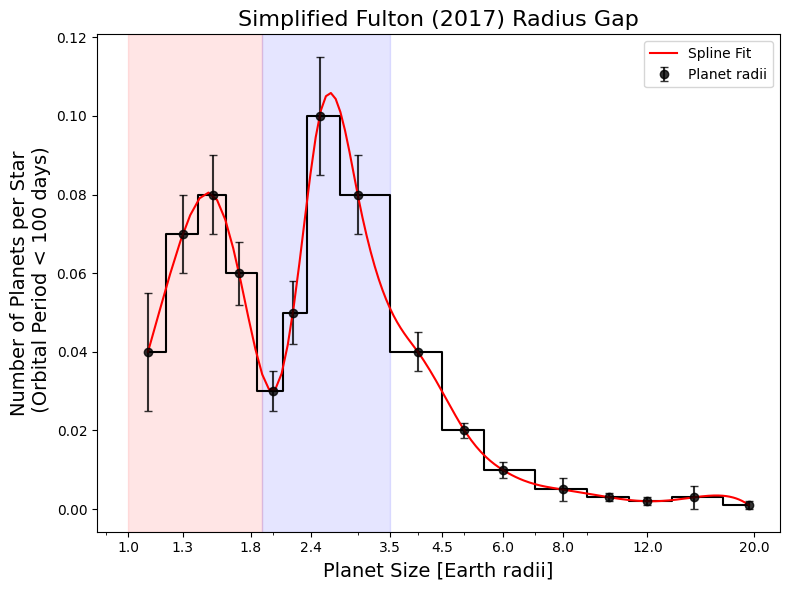

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Data for the black curve
x_black = np.array([1.1, 1.3, 1.5, 1.7, 2.0, 2.2, 2.5, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 15.0, 19.5])
y_black = np.array([0.04, 0.07, 0.08, 0.06, 0.03, 0.05, 0.10, 0.08, 0.04, 0.02, 0.01, 0.005, 0.003, 0.002, 0.003, 0.001])
y_err_black = np.array([0.015, 0.01, 0.01, 0.008, 0.005, 0.008, 0.015, 0.01, 0.005, 0.002, 0.002, 0.003, 0.001, 0.001, 0.003, 0.001])

# Interpolating the red curve as a spline fit to the black curve
x_spline = np.linspace(min(x_black), max(x_black), 300)
spline = make_interp_spline(x_black, y_black)
y_spline = spline(x_spline)

# Plotting the figure
plt.figure(figsize=(8, 6))

# Plot black curve with error bars
plt.errorbar(x_black, y_black, yerr=y_err_black, fmt='o', color='black', label='Planet radii', capsize=3, alpha=0.8)

plt.step(x_black, y_black, where='mid', color='black', linestyle='-')

# Plot red spline curve
plt.plot(x_spline, y_spline, color='red', label='Spline Fit', linestyle='-')

# Highlighting regions for bimodal radius distribution
plt.axvspan(1.0, 1.9, color='red', alpha=0.1)
plt.axvspan(1.9, 3.5, color='blue', alpha=0.1)

# Customize axes
plt.xscale('log')
plt.xlabel('Planet Size [Earth radii]', fontsize=14)
plt.ylabel(f'Number of Planets per Star\n (Orbital Period < 100 days)', fontsize=14)
plt.title('Simplified Fulton (2017) Radius Gap', fontsize=16)
plt.legend()
xticks = [1.0, 1.3, 1.8, 2.4, 3.5, 4.5, 6.0, 8.0, 12.0, 20.0]
plt.xticks(xticks, labels=[f'{tick}' for tick in xticks])
plt.tight_layout()

# Display the plot
plt.show()


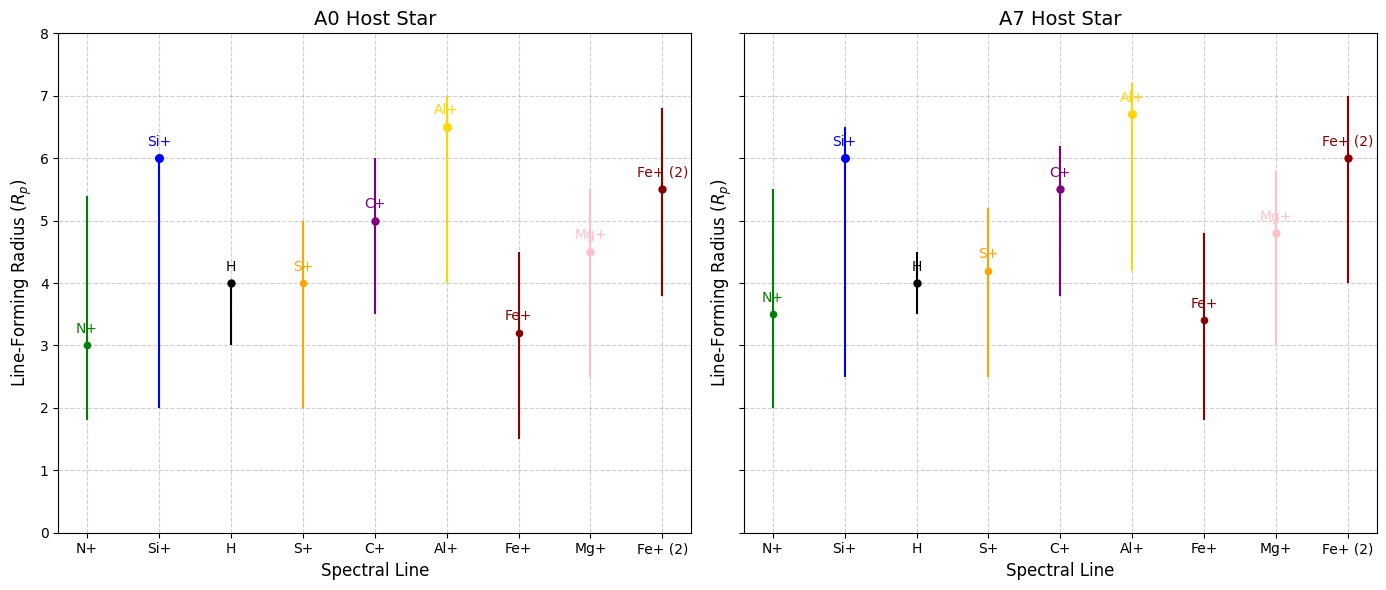

In [1]:
import matplotlib.pyplot as plt

# Updated data for line-forming radii and excess absorption for A0 and A7 host stars
spectral_lines_A0 = {
    'N+': {'radius_start': 1.8, 'radius_end': 5.4, 'radius_y': 3, 'dot_size': 20, 'color': 'green'},
    'Si+': {'radius_start': 2, 'radius_end': 6, 'radius_y': 6, 'dot_size': 30, 'color': 'blue'},
    'H': {'radius_start': 3, 'radius_end': 4, 'radius_y': 4, 'dot_size': 25, 'color': 'black'},
    'S+': {'radius_start': 2, 'radius_end': 5, 'radius_y': 4, 'dot_size': 20, 'color': 'orange'},
    'C+': {'radius_start': 3.5, 'radius_end': 6, 'radius_y': 5, 'dot_size': 25, 'color': 'purple'},
    'Al+': {'radius_start': 4, 'radius_end': 7, 'radius_y': 6.5, 'dot_size': 30, 'color': 'gold'},
    'Fe+': {'radius_start': 1.5, 'radius_end': 4.5, 'radius_y': 3.2, 'dot_size': 20, 'color': 'darkred'},
    'Mg+': {'radius_start': 2.5, 'radius_end': 5.5, 'radius_y': 4.5, 'dot_size': 25, 'color': 'pink'},
    'Fe+ (2)': {'radius_start': 3.8, 'radius_end': 6.8, 'radius_y': 5.5, 'dot_size': 25, 'color': 'darkred'}
}

spectral_lines_A7 = {
    'N+': {'radius_start': 2, 'radius_end': 5.5, 'radius_y': 3.5, 'dot_size': 20, 'color': 'green'},
    'Si+': {'radius_start': 2.5, 'radius_end': 6.5, 'radius_y': 6, 'dot_size': 30, 'color': 'blue'},
    'H': {'radius_start': 3.5, 'radius_end': 4.5, 'radius_y': 4, 'dot_size': 25, 'color': 'black'},
    'S+': {'radius_start': 2.5, 'radius_end': 5.2, 'radius_y': 4.2, 'dot_size': 20, 'color': 'orange'},
    'C+': {'radius_start': 3.8, 'radius_end': 6.2, 'radius_y': 5.5, 'dot_size': 25, 'color': 'purple'},
    'Al+': {'radius_start': 4.2, 'radius_end': 7.2, 'radius_y': 6.7, 'dot_size': 30, 'color': 'gold'},
    'Fe+': {'radius_start': 1.8, 'radius_end': 4.8, 'radius_y': 3.4, 'dot_size': 20, 'color': 'darkred'},
    'Mg+': {'radius_start': 3, 'radius_end': 5.8, 'radius_y': 4.8, 'dot_size': 25, 'color': 'pink'},
    'Fe+ (2)': {'radius_start': 4, 'radius_end': 7, 'radius_y': 6, 'dot_size': 25, 'color': 'darkred'}
}

# Plotting the panels
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Function to plot spectral lines
def plot_spectral_lines(ax, lines, title):
    for element, line in lines.items():
        # Plot the vertical line
        ax.vlines(x=[element], ymin=line['radius_start'], ymax=line['radius_end'], color=line['color'], linestyle='-', linewidth=1.5)
        # Plot the dot
        ax.scatter([element], [line['radius_y']], s=line['dot_size'], color=line['color'], zorder=5)
        # Add annotation
        ax.text(element, line['radius_y'] + 0.2, element, color=line['color'], fontsize=10, ha='center', zorder=10)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Spectral Line', fontsize=12)
    ax.set_ylabel('Line-Forming Radius ($R_p$)', fontsize=12)
    ax.set_ylim(0, 8)
    ax.grid(True, linestyle='--', alpha=0.6)

# Panel for A0 star
plot_spectral_lines(axes[0], spectral_lines_A0, 'A0 Host Star')

# Panel for A7 star
plot_spectral_lines(axes[1], spectral_lines_A7, 'A7 Host Star')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
